#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
app = pd.read_csv("application_record.csv")
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
app.shape

(438557, 18)

In [4]:
crec = pd.read_csv("credit_record.csv")
crec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
crec.shape

(1048575, 3)

In [6]:
len(set(crec['ID']).intersection(set(app['ID'])))

36457

#### Handling Duplicates

In [7]:
print(app.iloc[:,[0]].duplicated().sum())

47


In [8]:
print(app.duplicated().sum())
print(app.iloc[:,1:].duplicated().sum())
print(crec.duplicated().sum())

0
348472
0


In [9]:
app.drop_duplicates(subset=app.columns[1:],inplace=True)
app.shape

(90085, 18)

In [10]:
len(set(crec['ID']).intersection(set(app['ID'])))

9709

In [11]:
app.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [12]:
cat_cols_app = app.dtypes[app.dtypes=='object'].index
num_cols_app = app.dtypes[app.dtypes!='object'].index
print(cat_cols_app)
print(num_cols_app)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')
Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')


In [13]:
for i in app.columns:
    print(i,app[i].nunique())

ID 90085
CODE_GENDER 2
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 12
AMT_INCOME_TOTAL 866
NAME_INCOME_TYPE 5
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 5
NAME_HOUSING_TYPE 6
DAYS_BIRTH 16379
DAYS_EMPLOYED 9406
FLAG_MOBIL 1
FLAG_WORK_PHONE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 13


In [14]:
app.drop('FLAG_MOBIL',axis=1,inplace=True)
app.shape

(90085, 17)

In [15]:
for i in crec.columns:
    print(i,crec[i].nunique())

ID 45985
MONTHS_BALANCE 61
STATUS 8


#### Handling Missing Values

In [16]:
app.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [17]:
app['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 16624
Sales staff               9123
Core staff                8091
Managers                  6675
Drivers                   5860
High skill tech staff     3357
Accountants               3034
Medicine staff            2484
Cooking staff             1764
Security staff            1740
Cleaning staff            1222
Private service staff      750
Low-skill Laborers         569
Secretaries                412
Waiters/barmen staff       393
Realty agents              218
HR staff                   167
IT staff                   125
Name: count, dtype: int64

In [18]:
app['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)
app.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [19]:
crec.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [20]:
crec['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [21]:
crec['Target'] = crec['STATUS']
crec['Target'].replace('X', 0, inplace=True)
crec['Target'].replace('C', 0, inplace=True)
crec['Target']=crec['Target'].astype(int)
crec.loc[crec['Target']>=1,'Target']=1
crec.head()

,ID,MONTHS_BALANCE,STATUS,Target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


In [22]:
crec['ID'].duplicated().sum()

1002590

In [23]:
# crec['MONTHS_BALANCE'].value_counts()

In [24]:
print(crec.shape)

(1048575, 4)


In [25]:
target_data = crec.groupby(['ID'])['Target'].max().reset_index()
target_data.head()

,ID,Target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [26]:
df = pd.merge(app, target_data, how='inner', on=['ID'])
df.shape

(9709, 18)

In [27]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [28]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Target'],
      dtype='object')

In [29]:
crec.head()

,ID,MONTHS_BALANCE,STATUS,Target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0


In [30]:
start_df=pd.DataFrame(crec.groupby(['ID'])['MONTHS_BALANCE'].min().reset_index())
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)
start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']
start_df.head()

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59


In [31]:
df1 = pd.merge(df, start_df, how='inner', on=['ID'])
df1.shape

(9709, 19)

In [32]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Target', 'ACCOUNT_LENGTH'],
      dtype='object')

In [33]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,ACCOUNT_LENGTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1,15
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0,29
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0,4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0,20
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0,5


In [34]:
print(df1[df1['DAYS_EMPLOYED']>0].shape)  # unemployed

(1696, 19)


In [35]:
df1['Unemployed'] = 0                # employed
df1.loc[df1['DAYS_EMPLOYED']>0,'Unemployed'] = 1  # unemployed
df1['Unemployed'].value_counts()

Unemployed
0    8013
1    1696
Name: count, dtype: int64

In [36]:
df1['AGE_YEARS'] = round(-df1['DAYS_BIRTH']/365,0)
df1['AGE_YEARS'].value_counts()

AGE_YEARS
37.0    302
41.0    295
40.0    292
39.0    290
33.0    283
42.0    281
35.0    281
34.0    273
28.0    266
29.0    266
32.0    260
38.0    258
44.0    258
30.0    257
36.0    249
52.0    244
43.0    244
47.0    241
31.0    233
54.0    233
51.0    229
55.0    227
60.0    226
45.0    225
27.0    225
57.0    222
48.0    222
49.0    217
46.0    212
59.0    209
50.0    205
58.0    201
56.0    201
53.0    191
61.0    178
63.0    161
64.0    158
62.0    157
26.0    138
25.0    127
65.0    115
24.0     89
23.0     80
66.0     67
67.0     55
22.0     31
68.0     26
69.0      5
21.0      4
Name: count, dtype: int64

In [37]:
df1['YEARS_EMPLOYED'] = round(-df1['DAYS_EMPLOYED']/365,0)
df1.loc[df1['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,ACCOUNT_LENGTH,Unemployed,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,1,15,0,33.0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,29,0,59.0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,4,0,52.0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,Other,1.0,0,20,1,62.0,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,0,5,0,46.0,2.0


In [38]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'Target', 'ACCOUNT_LENGTH',
       'Unemployed', 'AGE_YEARS', 'YEARS_EMPLOYED'],
      dtype='object')

In [39]:
df1.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1,inplace=True)

In [40]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'Target', 'ACCOUNT_LENGTH', 'Unemployed', 'AGE_YEARS',
       'YEARS_EMPLOYED'],
      dtype='object')

In [41]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Target,ACCOUNT_LENGTH,Unemployed,AGE_YEARS,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,0,33.0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,0,59.0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,0,52.0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,1,62.0,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,0,46.0,2.0


#### Renaming Columns

In [42]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'Target', 'ACCOUNT_LENGTH', 'Unemployed', 'AGE_YEARS',
       'YEARS_EMPLOYED'],
      dtype='object')

In [43]:
df1 = df1.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
            'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
           'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
            'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
             'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
            'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
             'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
            'AGE_YEARS':'Age','YEARS_EMPLOYED':'Years_employed'})
df1.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Unemployed', 'Age',
       'Years_employed'],
      dtype='object')

In [44]:
num_cols = df1.dtypes[df1.dtypes!='object'].index
cat_cols = df1.dtypes[df1.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['ID', 'Num_children', 'Total_income', 'Work_phone', 'Phone', 'Email',
       'Num_family', 'Target', 'Account_length', 'Unemployed', 'Age',
       'Years_employed'],
      dtype='object')
Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_type',
       'Family_status', 'Housing_type', 'Occupation_type'],
      dtype='object')


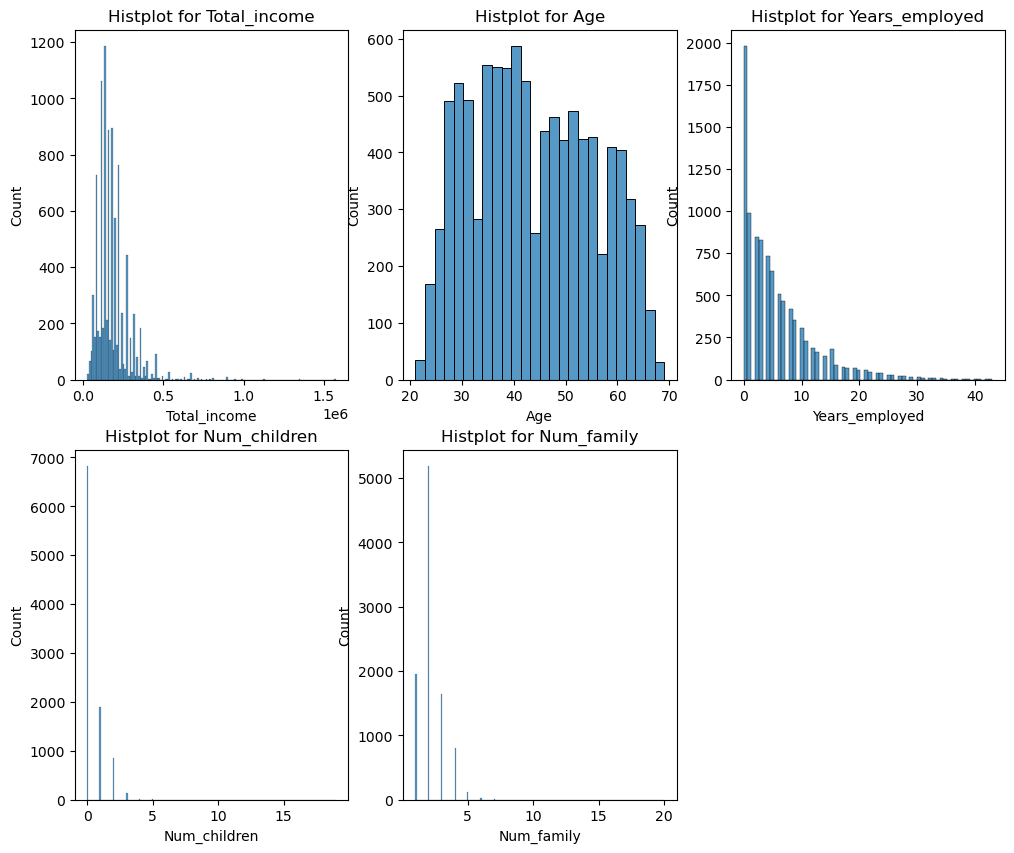

In [45]:
cols = ['Total_income','Age','Years_employed','Num_children', 'Num_family']
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.histplot(x=df1[cols[i]])
    plt.title(f'Histplot for {cols[i]}')

plt.show()

In [46]:
cat_cols

Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_type',
       'Family_status', 'Housing_type', 'Occupation_type'],
      dtype='object')

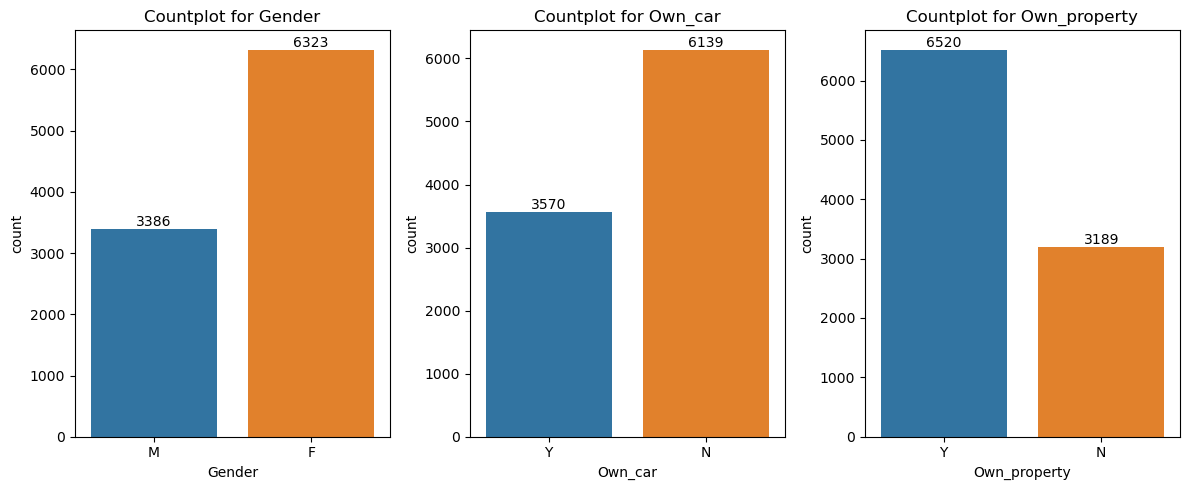

In [47]:
cols = ['Gender', 'Own_car', 'Own_property']
plt.figure(figsize=(12,5))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=df1[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

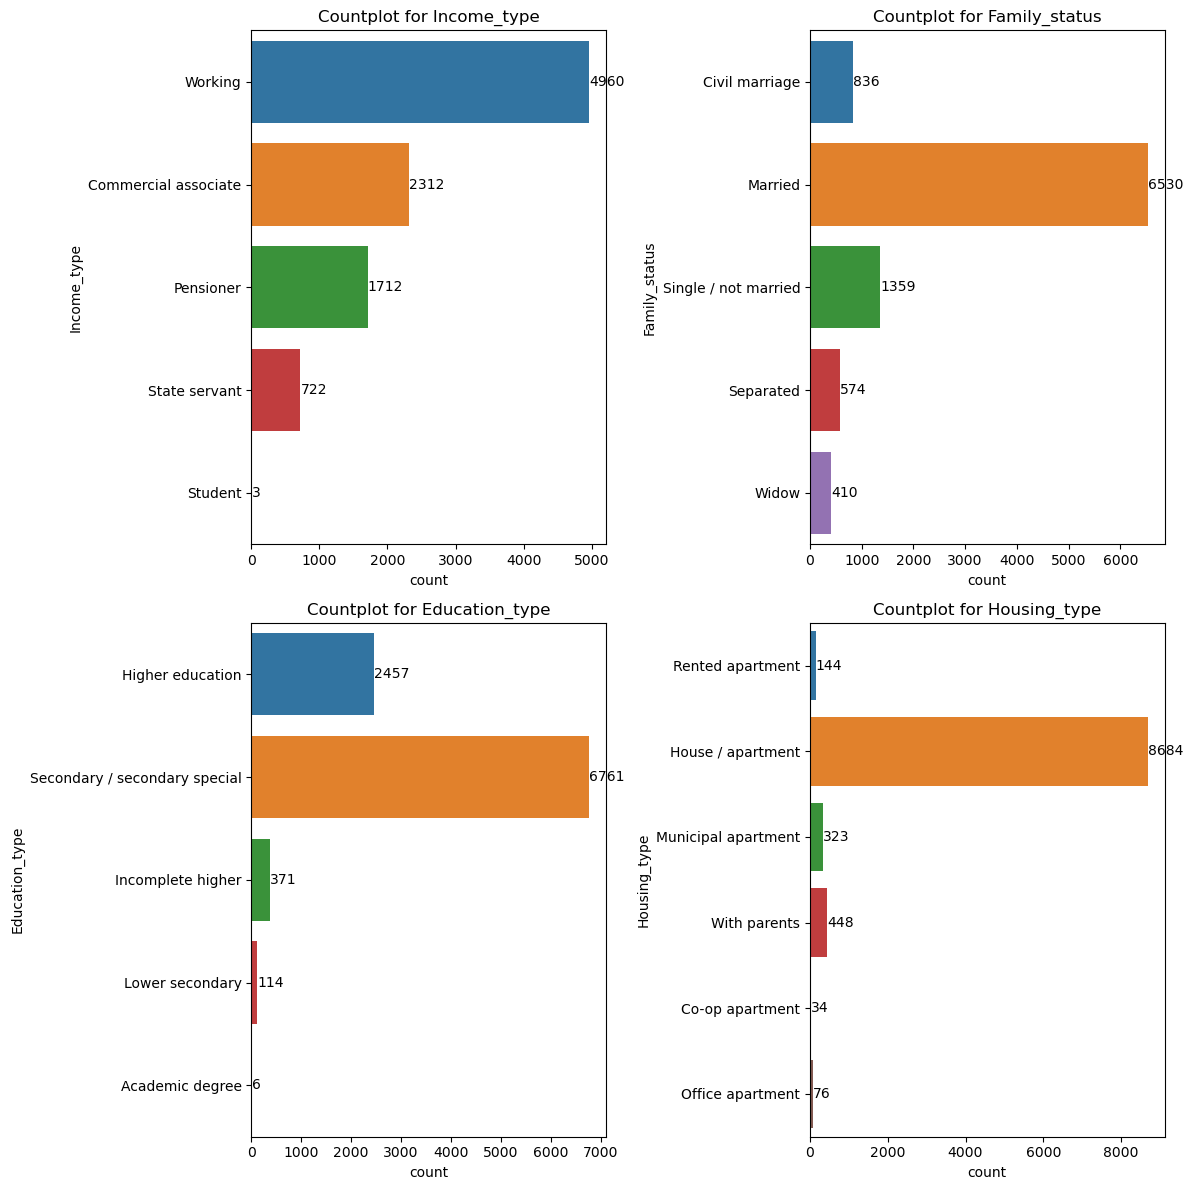

In [48]:
cols = ['Income_type','Family_status', 'Education_type', 'Housing_type']

plt.figure(figsize=(12,12))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(y=df1[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

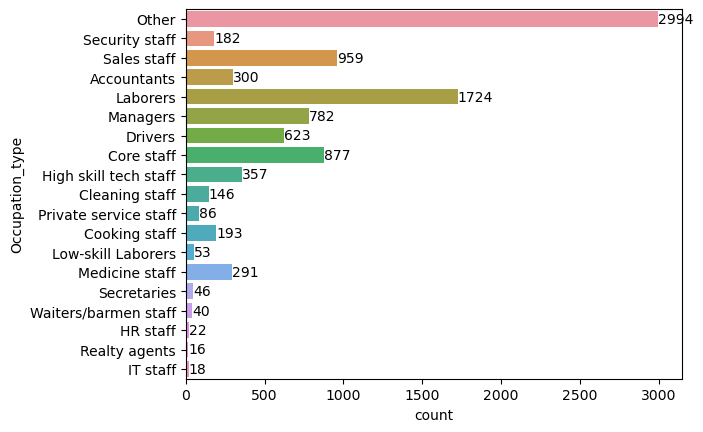

In [49]:
ax = sns.countplot(y=df1['Occupation_type'])
ax.bar_label(ax.containers[0])
plt.show()

In [50]:
for i in cat_cols:
    print(i,df1[i].nunique())

Gender 2
Own_car 2
Own_property 2
Income_type 5
Education_type 5
Family_status 5
Housing_type 6
Occupation_type 19


#### Encode Binary Features

In [51]:
df1["Gender"] =  df1["Gender"].replace(['F','M'],[0,1])
df1["Own_car"] = df1["Own_car"].replace(["Y","N"],[1,0])
df1["Own_property"] = df1["Own_property"].replace(["Y","N"],[1,0])

In [52]:
cat_cols = df1.dtypes[df1.dtypes=='object'].index
cat_cols

Index(['Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type'],
      dtype='object')

In [53]:
for i in cat_cols:
    print(f'Feature : {i}')
    print(df1[i].value_counts())
    print('*'*30)

Feature : Income_type
Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
******************************
Feature : Education_type
Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
******************************
Feature : Family_status
Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64
******************************
Feature : Housing_type
Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64
*******

In [54]:
print(df1['Income_type'].value_counts())
print(df1['Family_status'].value_counts())

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64


In [55]:
df1['Is_Working'] = df1["Income_type"].replace(["Working","Commercial associate",
                                                 "State servant","Pensioner",
                                                 "Student"],[1,1,1,0,0])

In [56]:
df1["Marital_status"] = df1["Family_status"].replace(["Civil marriage",
                         "Married","Single / not married",
                         "Separated","Widow"],[1,1,0,0,0])

In [57]:
df1['Housing_type'].value_counts()

Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: count, dtype: int64

In [58]:
housing_type_map = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}
df1["Housing_type"] = df1['Housing_type'].map(housing_type_map)

In [59]:
df1["Housing_type"].value_counts()

Housing_type
House / apartment    9261
With parents          448
Name: count, dtype: int64

In [60]:
education_type_map = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

df1["Education_type"] = df1["Education_type"].map(education_type_map)

In [61]:
df1["Education_type"].value_counts()

Education_type
secondary           6875
Higher education    2828
Academic degree        6
Name: count, dtype: int64

In [62]:
income_type_map = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}

df1["Income_type"] = df1["Income_type"].map(income_type_map)

In [63]:
df1["Income_type"].value_counts()

Income_type
Working      7994
Pensioner    1712
Student         3
Name: count, dtype: int64

In [64]:
df1["Marital_status"].value_counts()

Marital_status
1    7366
0    2343
Name: count, dtype: int64

In [65]:
df1["Household_Size"] = df1["Num_children"] + df1["Marital_status"].apply(lambda x: 2 if x==1 else 1)
df1["Household_Size"].value_counts()

Household_Size
2     5173
1     1957
3     1636
4      801
5      117
6       18
7        4
15       1
20       1
9        1
Name: count, dtype: int64

In [66]:
num_cols = df1.dtypes[df1.dtypes!='object'].index
cat_cols = df1.dtypes[df1.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Work_phone', 'Phone', 'Email', 'Num_family', 'Target',
       'Account_length', 'Unemployed', 'Age', 'Years_employed', 'Is_Working',
       'Marital_status', 'Household_Size'],
      dtype='object')
Index(['Income_type', 'Education_type', 'Family_status', 'Housing_type',
       'Occupation_type'],
      dtype='object')


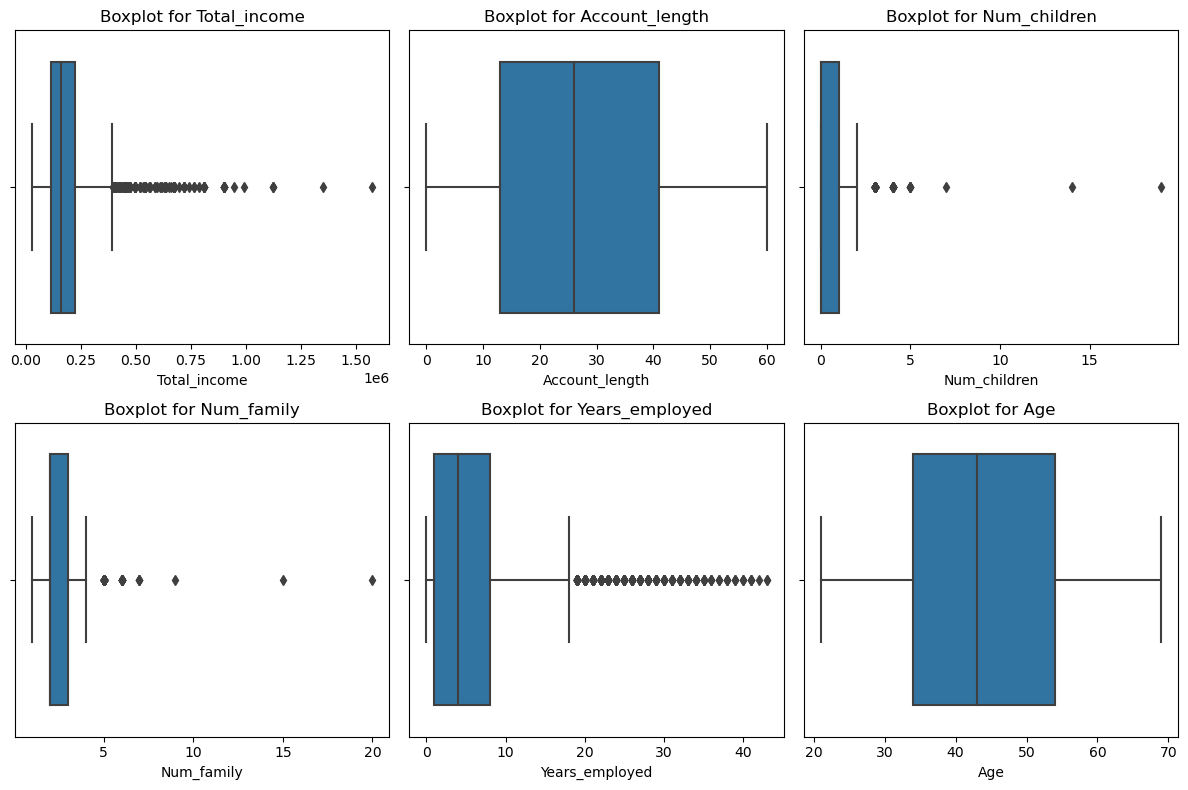

In [67]:
cols = ['Total_income','Account_length','Num_children','Num_family','Years_employed','Age']

plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    ax = sns.boxplot(x=df1[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [68]:
df1.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Unemployed', 'Age',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size'],
      dtype='object')

In [69]:
df1['Family_status'].value_counts()

Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: count, dtype: int64

In [70]:
drop_feat = ['ID','Work_phone', 'Phone', 'Email','Family_status']
df1.drop(drop_feat,axis=1,inplace=True)
df1.columns

Index(['Gender', 'Own_car', 'Own_property', 'Num_children', 'Total_income',
       'Income_type', 'Education_type', 'Housing_type', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Unemployed', 'Age',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size'],
      dtype='object')

In [71]:
num_cols = df1.dtypes[df1.dtypes!='object'].index
print(num_cols)

Index(['Gender', 'Own_car', 'Own_property', 'Num_children', 'Total_income',
       'Num_family', 'Target', 'Account_length', 'Unemployed', 'Age',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size'],
      dtype='object')


In [72]:
df1.columns

Index(['Gender', 'Own_car', 'Own_property', 'Num_children', 'Total_income',
       'Income_type', 'Education_type', 'Housing_type', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Unemployed', 'Age',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size'],
      dtype='object')

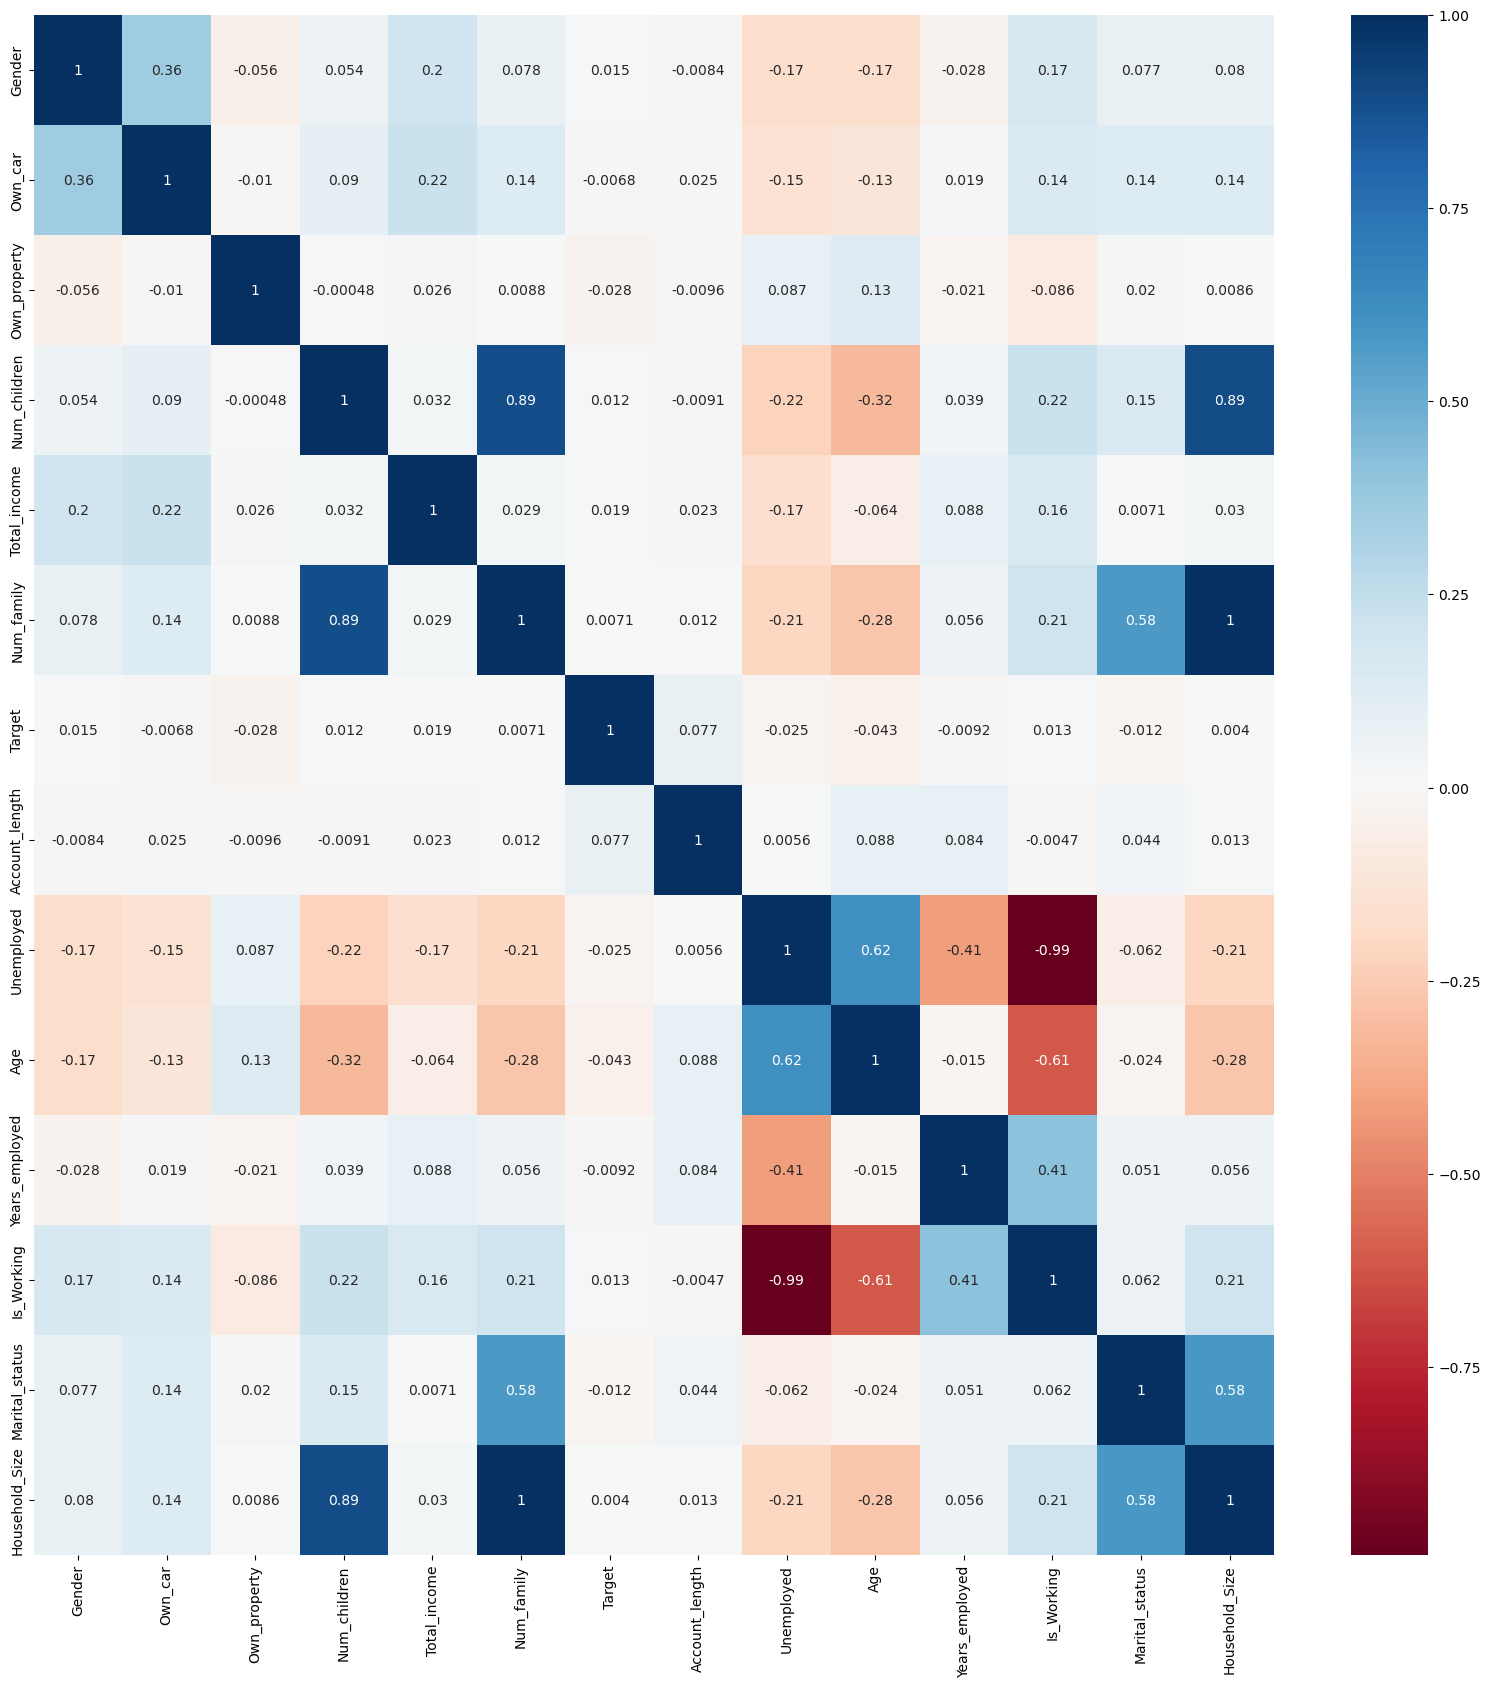

In [74]:
corr =  df1[num_cols].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [75]:
drop_feat1 = ['Num_family','Num_children','Is_Working']
df1.drop(drop_feat1,axis=1,inplace=True)

In [76]:
df1.columns

Index(['Gender', 'Own_car', 'Own_property', 'Total_income', 'Income_type',
       'Education_type', 'Housing_type', 'Occupation_type', 'Target',
       'Account_length', 'Unemployed', 'Age', 'Years_employed',
       'Marital_status', 'Household_Size'],
      dtype='object')

In [77]:
df1['Housing_type'].value_counts()

Housing_type
House / apartment    9261
With parents          448
Name: count, dtype: int64

In [78]:
df1.shape

(9709, 15)

In [79]:
df1.head()

,Gender,Own_car,Own_property,Total_income,Income_type,Education_type,Housing_type,Occupation_type,Target,Account_length,Unemployed,Age,Years_employed,Marital_status,Household_Size
0,1,1,1,427500.0,Working,Higher education,House / apartment,Other,1,15,0,33.0,12.0,1,2
1,1,1,1,112500.0,Working,secondary,House / apartment,Security staff,0,29,0,59.0,3.0,1,2
2,0,0,1,270000.0,Working,secondary,House / apartment,Sales staff,0,4,0,52.0,8.0,0,1
3,0,0,1,283500.0,Pensioner,Higher education,House / apartment,Other,0,20,1,62.0,0.0,0,1
4,1,1,1,270000.0,Working,Higher education,House / apartment,Accountants,0,5,0,46.0,2.0,1,2


In [80]:
num_cols = df1.dtypes[df1.dtypes!='object'].index
cat_cols = df1.dtypes[df1.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['Gender', 'Own_car', 'Own_property', 'Total_income', 'Target',
       'Account_length', 'Unemployed', 'Age', 'Years_employed',
       'Marital_status', 'Household_Size'],
      dtype='object')
Index(['Income_type', 'Education_type', 'Housing_type', 'Occupation_type'], dtype='object')


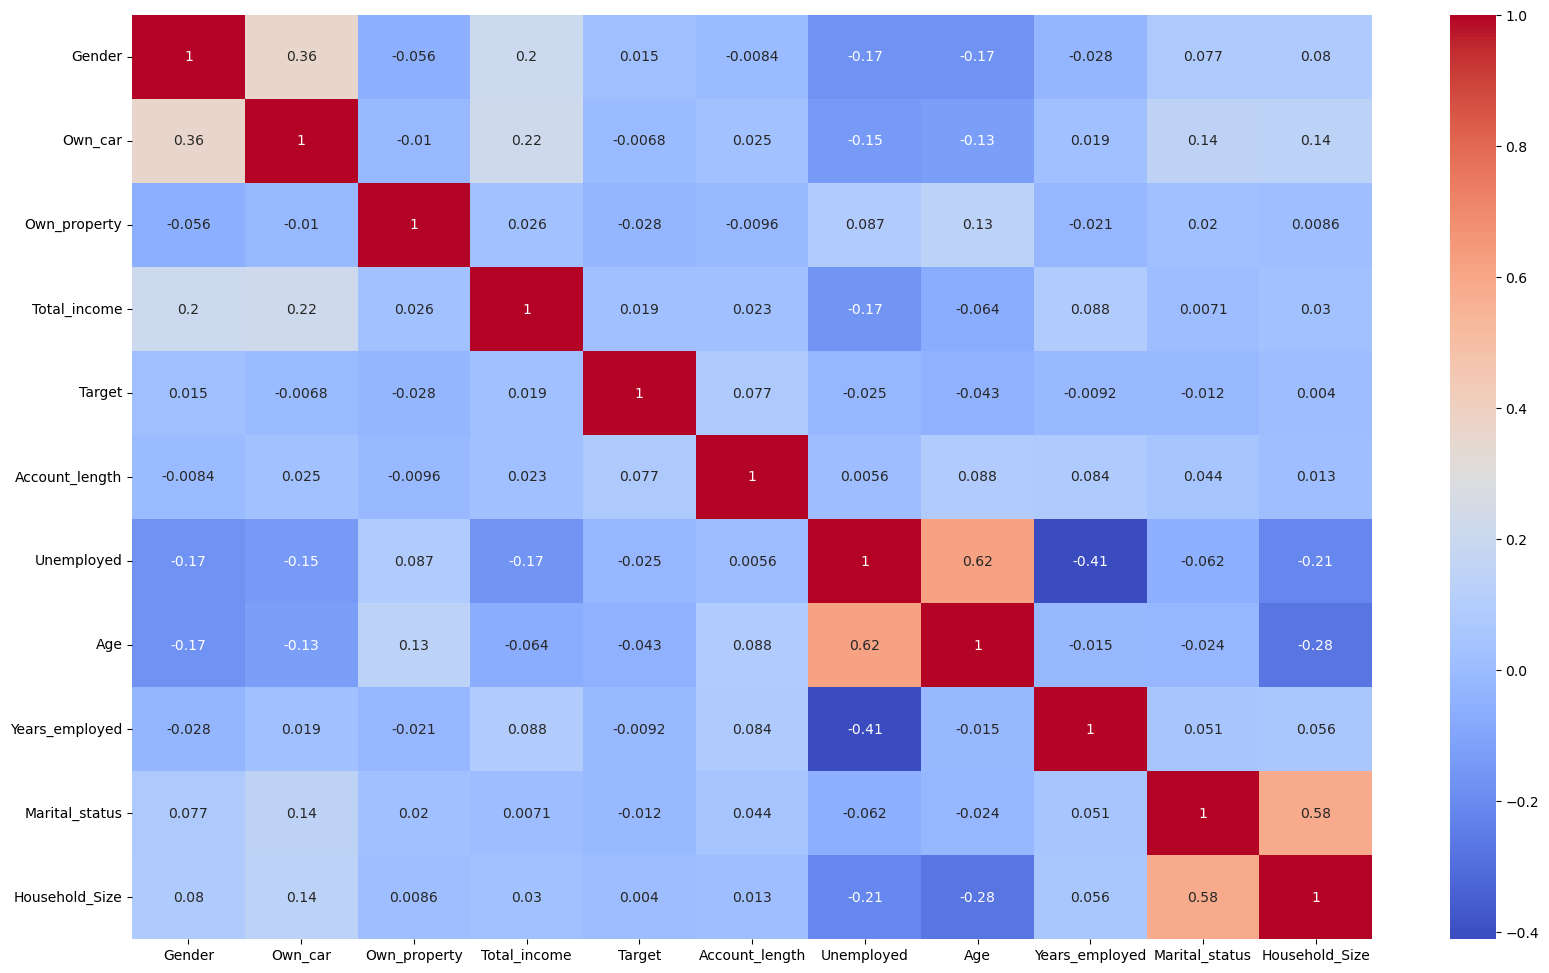

In [81]:
plt.figure(figsize=(20,12))
sns.heatmap(df1[num_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

#### Handling Outliers

In [82]:
num_cols

Index(['Gender', 'Own_car', 'Own_property', 'Total_income', 'Target',
       'Account_length', 'Unemployed', 'Age', 'Years_employed',
       'Marital_status', 'Household_Size'],
      dtype='object')

In [83]:
for i in num_cols:
    print(i,df1[i].nunique())

Gender 2
Own_car 2
Own_property 2
Total_income 263
Target 2
Account_length 61
Unemployed 2
Age 49
Years_employed 44
Marital_status 2
Household_Size 10


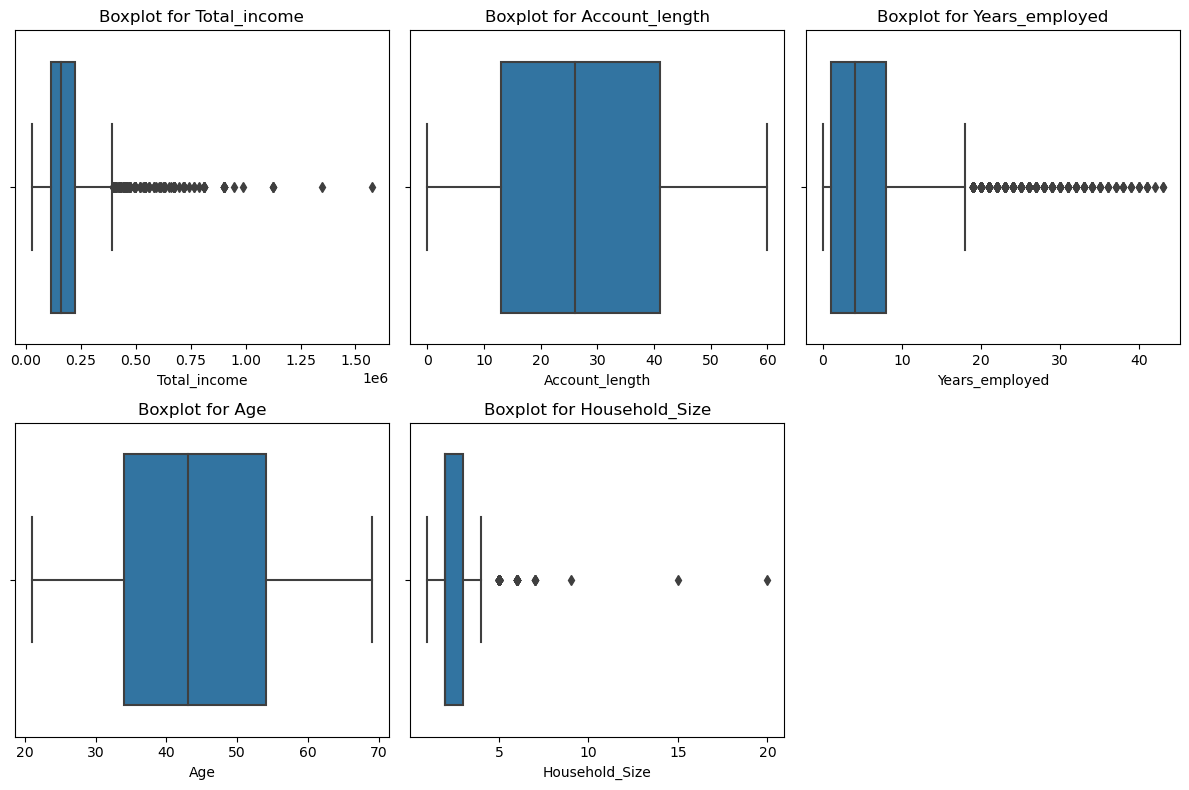

In [84]:
cols = ['Total_income','Account_length','Years_employed','Age','Household_Size']

plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    ax = sns.boxplot(x=df1[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [85]:
a = df1[['Total_income','Years_employed','Household_Size']].describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
Total_income,27000.0,49500.0,63000.0,67500.0,157500.0,405000.0,450000.0,540000.0,1575000.0
Years_employed,0.0,0.0,0.0,0.0,4.0,22.0,25.0,29.0,43.0
Household_Size,1.0,1.0,1.0,1.0,2.0,4.0,4.0,5.0,20.0


In [86]:
df1.shape

(9709, 15)

In [87]:
print(df1[df1['Years_employed']>25].shape)
print(df1[df1['Years_employed']>29].shape)
print(df1[df1['Total_income']>540000].shape)
print(df1[df1['Total_income']>450000].shape)
print(df1[df1['Household_Size']>5].shape)

(177, 15)
(87, 15)
(78, 15)
(131, 15)
(25, 15)


In [88]:
df2 = df1.copy()

In [89]:
df1['Total_income'] = np.where(df1['Total_income']>540000,540000,df1['Total_income'])
df1['Years_employed'] = np.where(df1['Years_employed']>25,25,df1['Years_employed'])
df1['Household_Size'] = np.where(df1['Household_Size']>5,5,df1['Household_Size'])

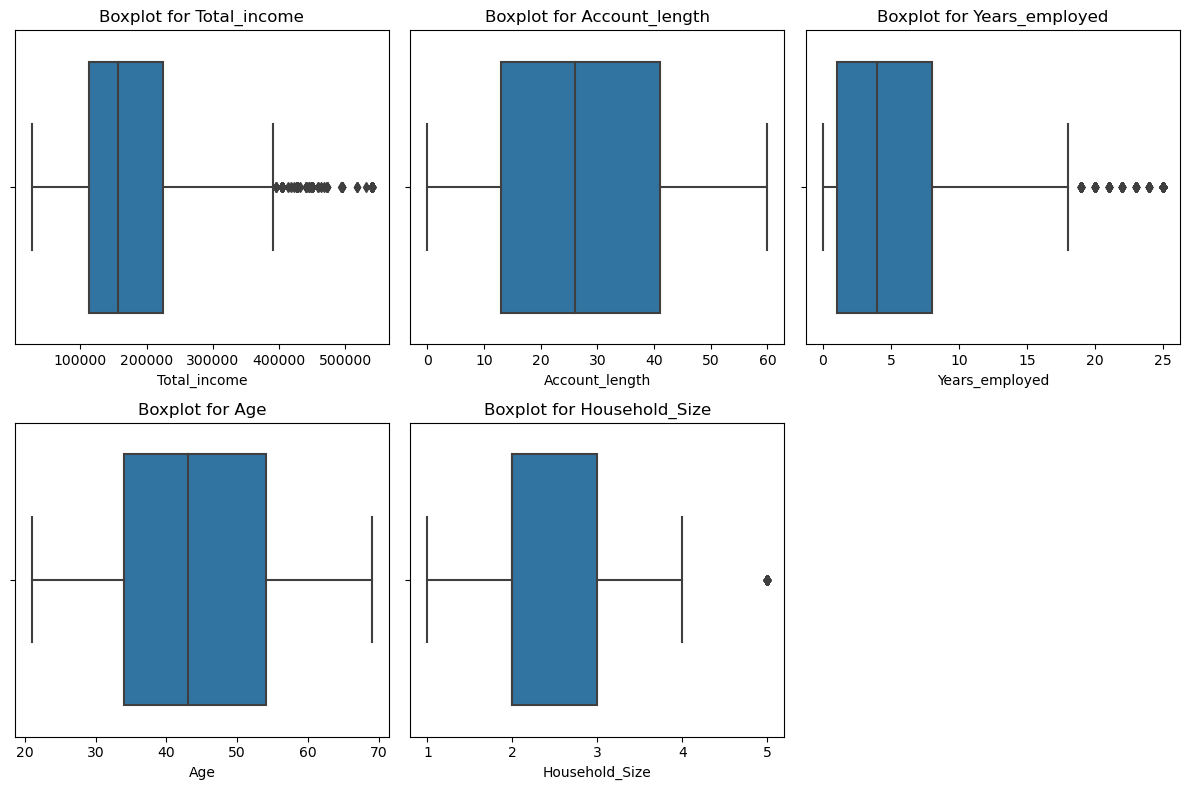

In [90]:
cols = ['Total_income','Account_length','Years_employed','Age','Household_Size']

plt.figure(figsize=(12,8))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    ax = sns.boxplot(x=df1[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [91]:
df1.columns

Index(['Gender', 'Own_car', 'Own_property', 'Total_income', 'Income_type',
       'Education_type', 'Housing_type', 'Occupation_type', 'Target',
       'Account_length', 'Unemployed', 'Age', 'Years_employed',
       'Marital_status', 'Household_Size'],
      dtype='object')

In [92]:
cat_cols

Index(['Income_type', 'Education_type', 'Housing_type', 'Occupation_type'], dtype='object')

In [93]:
for i in cat_cols:
    print(i,df1[i].nunique())

Income_type 3
Education_type 3
Housing_type 2
Occupation_type 19


In [94]:
df1['Housing_type'].value_counts()

Housing_type
House / apartment    9261
With parents          448
Name: count, dtype: int64

In [106]:
cols = ['Income_type','Education_type']    # 'Housing_type']

df1_dum = pd.get_dummies(data=df1,columns=cols,drop_first=True,dtype=int)
print(df1_dum.shape)
df1_dum.columns

(9709, 17)


Index(['Gender', 'Own_car', 'Own_property', 'Total_income', 'Housing_type',
       'Occupation_type', 'Target', 'Account_length', 'Unemployed', 'Age',
       'Years_employed', 'Marital_status', 'Household_Size',
       'Income_type_Student', 'Income_type_Working',
       'Education_type_Higher education', 'Education_type_secondary'],
      dtype='object')

In [107]:
df1_dum.dtypes

Gender                               int64
Own_car                              int64
Own_property                         int64
Total_income                       float64
Housing_type                        object
Occupation_type                     object
Target                               int32
Account_length                       int64
Unemployed                           int64
Age                                float64
Years_employed                     float64
Marital_status                       int64
Household_Size                       int64
Income_type_Student                  int32
Income_type_Working                  int32
Education_type_Higher education      int32
Education_type_secondary             int32
dtype: object

In [108]:
# from sklearn.preprocessing import LabelEncoder

In [109]:
# lb = LabelEncoder()
# df1_dum['Occupation_type'] = lb.fit_transform(df1_dum['Occupation_type'])

In [110]:
df1_dum.head()

,Gender,Own_car,Own_property,Total_income,Housing_type,Occupation_type,Target,Account_length,Unemployed,Age,Years_employed,Marital_status,Household_Size,Income_type_Student,Income_type_Working,Education_type_Higher education,Education_type_secondary
0,1,1,1,427500.0,House / apartment,Other,1,15,0,33.0,12.0,1,2,0,1,1,0
1,1,1,1,112500.0,House / apartment,Security staff,0,29,0,59.0,3.0,1,2,0,1,0,1
2,0,0,1,270000.0,House / apartment,Sales staff,0,4,0,52.0,8.0,0,1,0,1,0,1
3,0,0,1,283500.0,House / apartment,Other,0,20,1,62.0,0.0,0,1,0,0,1,0
4,1,1,1,270000.0,House / apartment,Accountants,0,5,0,46.0,2.0,1,2,0,1,1,0


#### Select x and y

In [111]:
x = df1_dum.drop(['Target','Occupation_type','Housing_type'],axis=1)
y = df1_dum['Target']
print(x.shape)
print(y.shape)

(9709, 14)
(9709,)


In [112]:
df1_dum['Target'].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

#### Split data into Train and Test

In [113]:
from sklearn.model_selection import train_test_split 

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6796, 14)
(2913, 14)
(6796,)
(2913,)


In [115]:
x_train.dtypes

Gender                               int64
Own_car                              int64
Own_property                         int64
Total_income                       float64
Account_length                       int64
Unemployed                           int64
Age                                float64
Years_employed                     float64
Marital_status                       int64
Household_Size                       int64
Income_type_Student                  int32
Income_type_Working                  int32
Education_type_Higher education      int32
Education_type_secondary             int32
dtype: object

In [116]:
from sklearn.metrics import *

In [117]:
def eval_model(ytest,ypred,model_name):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred,zero_division=0))
    pre1 = precision_score(ytest,ypred,zero_division=0)
    rec1 = recall_score(ytest,ypred,zero_division=0)
    pre0 = precision_score(ytest,ypred,pos_label=0,zero_division=0)
    rec0 = recall_score(ytest,ypred,pos_label=0,zero_division=0)
    acc = accuracy_score(ytest,ypred)
    res = pd.DataFrame({'Pre0':pre0,'Rec0':rec0,'Pre1':pre1,'Rec1':rec1,'Train_Acc':acc},
                       index=[model_name])
    return res

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#### 1) LogReg

In [119]:
lr1 = LogisticRegression(max_iter=1000,random_state=45)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=45)

In [120]:
ypred_lr1 = lr1.predict(x_test)
lr1_res = eval_model(y_test,ypred_lr1,'LogReg')
lr1_res

[[2499    0]
 [ 414    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2499
           1       0.00      0.00      0.00       414

    accuracy                           0.86      2913
   macro avg       0.43      0.50      0.46      2913
weighted avg       0.74      0.86      0.79      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
LogReg,0.857878,1.0,0.0,0.0,0.857878


#### 2) DT

In [121]:
dt1 = DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=10)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=10)

In [122]:
from collections import Counter
print(Counter(y_test))

Counter({0: 2499, 1: 414})


In [123]:
ypred_dt1 = dt1.predict(x_test)
dt1_res = eval_model(y_test,ypred_dt1,'DT')
dt1_res

[[2293  206]
 [ 382   32]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2499
           1       0.13      0.08      0.10       414

    accuracy                           0.80      2913
   macro avg       0.50      0.50      0.49      2913
weighted avg       0.75      0.80      0.77      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
DT,0.857196,0.917567,0.134454,0.077295,0.798146


#### 2) RF

In [124]:
rf1 = RandomForestClassifier(n_estimators=100,criterion="entropy",
                             max_depth=15,min_samples_split=12,
                             random_state=70)
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=12,
                       random_state=70)

In [125]:
ypred_rf1 = rf1.predict(x_test)
rf1_res = eval_model(y_test,ypred_rf1,'RF')
rf1_res

[[2498    1]
 [ 413    1]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2499
           1       0.50      0.00      0.00       414

    accuracy                           0.86      2913
   macro avg       0.68      0.50      0.46      2913
weighted avg       0.81      0.86      0.79      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
RF,0.858124,0.9996,0.5,0.002415,0.857878


#### AdaBoostClassifier

In [128]:
ada1 = AdaBoostClassifier(n_estimators=140,random_state=25)
ada1.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=140, random_state=25)

In [129]:
ypred_ada1 = ada1.predict(x_test)
ada1_res = eval_model(y_test,ypred_ada1,'AdaBoost')
ada1_res

[[2494    5]
 [ 413    1]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2499
           1       0.17      0.00      0.00       414

    accuracy                           0.86      2913
   macro avg       0.51      0.50      0.46      2913
weighted avg       0.76      0.86      0.79      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
AdaBoost,0.857929,0.997999,0.166667,0.002415,0.856505


#### GradientBoost

In [130]:

# gb1 = GradientBoostingClassifier(learning_rate=0.2,n_estimators=100,
#                                 min_samples_split=4)
gb1 = GradientBoostingClassifier(learning_rate=0.3,n_estimators=100,
                                min_samples_split=8)
gb1.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, min_samples_split=8)

In [131]:
ypred_gb1 = gb1.predict(x_test)
gb1_res = eval_model(y_test,ypred_gb1,'GradBoost')
gb1_res

[[2486   13]
 [ 408    6]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2499
           1       0.32      0.01      0.03       414

    accuracy                           0.86      2913
   macro avg       0.59      0.50      0.47      2913
weighted avg       0.78      0.86      0.79      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
GradBoost,0.859019,0.994798,0.315789,0.014493,0.855475


#### XGBoost

In [132]:
xgb1 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                     n_estimators=100,random_state=10,gamma=0.2,reg_lambda=0.3)
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=10, ...)

In [133]:
ypred_xgb1 = xgb1.predict(x_test)
xgb1_res = eval_model(y_test,ypred_xgb1,'XGBoost')
xgb1_res

[[2487   12]
 [ 410    4]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2499
           1       0.25      0.01      0.02       414

    accuracy                           0.86      2913
   macro avg       0.55      0.50      0.47      2913
weighted avg       0.77      0.86      0.79      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
XGBoost,0.858474,0.995198,0.25,0.009662,0.855132


#### KNN Classifier

In [134]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [135]:
ypred_knn1 = knn1.predict(x_test)
knn1_res = eval_model(y_test,ypred_knn1,'KNN')
knn1_res

[[2445   54]
 [ 399   15]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2499
           1       0.22      0.04      0.06       414

    accuracy                           0.84      2913
   macro avg       0.54      0.51      0.49      2913
weighted avg       0.77      0.84      0.79      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
KNN,0.859705,0.978391,0.217391,0.036232,0.84449


#### Handing Data Imbalance - SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

In [137]:
sm = SMOTE(sampling_strategy=1)
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [138]:
from collections import Counter
print(Counter(y_sm))

Counter({0: 5927, 1: 5927})


#### LR with SMOTE

In [139]:
lr2 = LogisticRegression(max_iter=1000)
lr2.fit(x_sm,y_sm)

LogisticRegression(max_iter=1000)

In [140]:
ypred_lr2 = lr2.predict(x_test)
lr2_sm_res = eval_model(y_test,ypred_lr2,'LogReg_SMOTE')
lr2_sm_res

[[1353 1146]
 [ 186  228]]
              precision    recall  f1-score   support

           0       0.88      0.54      0.67      2499
           1       0.17      0.55      0.26       414

    accuracy                           0.54      2913
   macro avg       0.52      0.55      0.46      2913
weighted avg       0.78      0.54      0.61      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
LogReg_SMOTE,0.879142,0.541417,0.165939,0.550725,0.542739


#### DT with SMOTE

In [141]:
dt2 = DecisionTreeClassifier(criterion="entropy",max_depth=10,
                             random_state=10)
dt2.fit(x_sm,y_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [142]:
ypred_dt2 = dt2.predict(x_test)
dt2_sm_res = eval_model(y_test,ypred_dt2,'DT_with_SMOTE')
dt2_sm_res

[[2022  477]
 [ 334   80]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2499
           1       0.14      0.19      0.16       414

    accuracy                           0.72      2913
   macro avg       0.50      0.50      0.50      2913
weighted avg       0.76      0.72      0.74      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
DT_with_SMOTE,0.858234,0.809124,0.143627,0.193237,0.721593


#### RF with SMOTE

In [143]:
rf2 = RandomForestClassifier(n_estimators =80, criterion="entropy",
                             max_depth=15,min_samples_split=10,
                             random_state=20)
rf2.fit(x_sm,y_sm)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=10,
                       n_estimators=80, random_state=20)

In [144]:
ypred_rf2 = rf2.predict(x_test)
rf2_sm_res = eval_model(y_test,ypred_rf2,'RF_with_SMOTE')
rf2_sm_res

[[2218  281]
 [ 359   55]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2499
           1       0.16      0.13      0.15       414

    accuracy                           0.78      2913
   macro avg       0.51      0.51      0.51      2913
weighted avg       0.76      0.78      0.77      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
RF_with_SMOTE,0.860691,0.887555,0.16369,0.13285,0.780295


#### AdaBoost with SMOTE

In [145]:
ada2 = AdaBoostClassifier(n_estimators=100,random_state=25)
ada2.fit(x_sm,y_sm)

AdaBoostClassifier(n_estimators=100, random_state=25)

In [146]:
ypred_ada2 = ada2.predict(x_test)
ada2_sm_res = eval_model(y_test,ypred_ada2,'AdaBoost_with_SMOTE')
ada2_sm_res

[[2142  357]
 [ 338   76]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2499
           1       0.18      0.18      0.18       414

    accuracy                           0.76      2913
   macro avg       0.52      0.52      0.52      2913
weighted avg       0.77      0.76      0.76      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
AdaBoost_with_SMOTE,0.86371,0.857143,0.17552,0.183575,0.761414


#### GradientBoost with SMOTE

In [147]:
gb2 = GradientBoostingClassifier(learning_rate=0.3,n_estimators=100,
                                min_samples_split=8)
gb2.fit(x_sm,y_sm)

GradientBoostingClassifier(learning_rate=0.3, min_samples_split=8)

In [148]:
ypred_gb2 = gb2.predict(x_test)
gb2_sm_res = eval_model(y_test,ypred_gb2,'GradBoost_with_SMOTE')
gb2_sm_res

[[2453   46]
 [ 399   15]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2499
           1       0.25      0.04      0.06       414

    accuracy                           0.85      2913
   macro avg       0.55      0.51      0.49      2913
weighted avg       0.77      0.85      0.80      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
GradBoost_with_SMOTE,0.860098,0.981593,0.245902,0.036232,0.847237


#### XGBoost with SMOTE

In [149]:
xgb2 = XGBClassifier(n_estimators=100,random_state=10,gamma=0.5)
xgb2.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [150]:
ypred_xgb2 = xgb2.predict(x_test)
xgb2_sm_res = eval_model(y_test,ypred_xgb2,'XGBoost_with_SMOTE')
xgb2_sm_res

[[2391  108]
 [ 391   23]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2499
           1       0.18      0.06      0.08       414

    accuracy                           0.83      2913
   macro avg       0.52      0.51      0.49      2913
weighted avg       0.76      0.83      0.79      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
XGBoost_with_SMOTE,0.859454,0.956783,0.175573,0.055556,0.828699


#### KNN with SMOTE

In [151]:
knn2 = KNeighborsClassifier(n_neighbors=11)
knn2.fit(x_sm,y_sm)

KNeighborsClassifier(n_neighbors=11)

In [152]:
ypred_knn2 = knn2.predict(x_test)
knn2_sm_res = eval_model(y_test,ypred_knn2,'KNN_with_SMOTE')
knn2_sm_res

# positive=0, negative = 1
# [TP FN]
# [FP TN]

# positive=1, negative = 0 
# [Credit Card Approved : 0(negative), Credit Card Not Approved : 1(positive)]
# [TN FP]
# [FN TP]

#          Actual                                           Predicted
# FP :     Credit Card should have been Approved            Credit Card Not Approved
# FN :     Credit Card should not have been Approved        Credit Card has been Approved

# FN should be min => Recall shud be high

[[1499 1000]
 [ 232  182]]
              precision    recall  f1-score   support

           0       0.87      0.60      0.71      2499
           1       0.15      0.44      0.23       414

    accuracy                           0.58      2913
   macro avg       0.51      0.52      0.47      2913
weighted avg       0.76      0.58      0.64      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
KNN_with_SMOTE,0.865973,0.59984,0.153976,0.439614,0.577068


In [154]:
all_res = pd.concat([lr1_res,dt1_res,rf1_res,ada1_res,gb1_res,knn1_res,xgb1_res,
                    lr2_sm_res,dt2_sm_res,rf2_sm_res,ada2_sm_res,gb2_sm_res,knn2_sm_res,
                     xgb2_sm_res])
all_res

,Pre0,Rec0,Pre1,Rec1,Train_Acc
LogReg,0.857878,1.000000,0.000000,0.000000,0.857878
DT,0.857196,0.917567,0.134454,0.077295,0.798146
RF,0.858124,0.999600,0.500000,0.002415,0.857878
AdaBoost,0.857929,0.997999,0.166667,0.002415,0.856505
GradBoost,0.859019,0.994798,0.315789,0.014493,0.855475
KNN,0.859705,0.978391,0.217391,0.036232,0.844490
XGBoost,0.858474,0.995198,0.250000,0.009662,0.855132
LogReg_SMOTE,0.879142,0.541417,0.165939,0.550725,0.542739
DT_with_SMOTE,0.858234,0.809124,0.143627,0.193237,0.721593
RF_with_SMOTE,0.860691,0.887555,0.163690,0.132850,0.780295


In [155]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [158]:
hparams_xgb = {'n_estimators': [70,80,90,100],
              'eta':[0.1,0.2,0.3,0.4,0.5],               # Learning Rate
              'gamma':[0.1,0.2,0.3,0.4,0.5],             # Control prunnig
              'max_depth':[5,6,7,8],
              'lambda':[0.1,0.2,0.3,0.4,0.5],            # regularization
              'alpha':[0.1,0.2,0.3]}                     # regularization
# 4*5*5*4*5*3

In [157]:
xgb_base = XGBClassifier(objective='binary:logistic',eval_metric='logloss')

rs_cv = RandomizedSearchCV(estimator=xgb_base,param_distributions=hparams_xgb,
                           scoring='recall',cv=5)
rs_cv.fit(x_sm,y_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'alpha': [0.1, 0.2, 0.3],
                                        'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'lambda': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'max_depth': [5, 6, 7, 8],
                                        'n_estimators': [70, 80, 90, 100]},
                   scoring='recall')

In [159]:
Counter(y_test)

Counter({0: 2499, 1: 414})

In [160]:
print(rs_cv.score(x_sm,y_sm))
print(rs_cv.score(x_test,y_test))

0.9650750801417243
0.04830917874396135


In [161]:
print(rs_cv.best_score_)
print(rs_cv.best_params_)

0.8472647839420524
{'n_estimators': 90, 'max_depth': 7, 'lambda': 0.3, 'gamma': 0.1, 'eta': 0.5, 'alpha': 0.3}


#### XGBoost after Randomized Search CV

In [162]:
xgb3 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',**rs_cv.best_params_)
xgb3.fit(x_sm,y_sm)

XGBClassifier(alpha=0.3, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.5, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=0.3,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=90, ...)

In [164]:
ypred_xgb3 = xgb3.predict(x_test)
xgb3_sm_res = eval_model(y_test,ypred_xgb3,'XGBoost_SMOTE_after_RSCV')
xgb3_sm_res

[[2327  172]
 [ 394   20]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2499
           1       0.10      0.05      0.07       414

    accuracy                           0.81      2913
   macro avg       0.48      0.49      0.48      2913
weighted avg       0.75      0.81      0.77      2913



,Pre0,Rec0,Pre1,Rec1,Train_Acc
XGBoost_SMOTE_after_RSCV,0.8552,0.931172,0.104167,0.048309,0.805699


### Best Model
 1) LogReg and KNN with SMOTE